<a href="https://colab.research.google.com/github/seonarayo/kentech_tutorial_EFchem/blob/main/2023_fall_fundamentals_of_molecular_simulation/question2_fluctuation_dissipation_theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 2. The Balance between Dissipation and Fluctuation.

In Class, we discussed the balance between a heat sink and a heat source from a solvent with an example of a harmonic oscillator at a molecular scale. Friction tends to drive any system to a completely "dead" state, while noise, which tends to keep the system "alive." As we discussed in Class, this balance is required to have a thermal equilibrium state at long times. This question illustrates how to determine the strength of the fluctuation to satisfy the equipartition theorem (See Question 1, if you are not familiar with the theorem). There are 7 small questions.

## Reminder: Stochastic equation of motion for a particle in a solvent liquid.

The randomness of an individual trajectory of a particle of mass $m$ in a solvent is described by the equation of motion below with the random force $\delta F(t)$:

$$ m\frac{dv}{dt} = -\xi v + \delta F(t)$$, (Eq. 1)
where $v$ is velocity of the particle and $\xi$ is a friction coefficient. The $\textit{fluctuating}$ force satisfies the following condition to be called "random":

$$ (i) \langle \delta F(t) \rangle = 0.$$

$$ (ii) \langle \delta F(t)\delta F(t')\rangle=2B\delta(t-t').$$
Here, $\delta(t-t')$ is a delta function (1 if $t=t'$ or 0 otherwise). $B$ is a measure of the strength of the fluctuating force, and $\langle\cdots\rangle$ represents the ensemble average.

Eq. 1 can be solved analytically and the average of $v^2(t)$, which is related to the thermal energy, is as follows:

$$ \langle v^2(t)\rangle = \exp(-2\xi t/m)v^2(0) + \frac{B}{\xi m}[1-\exp(-2\xi t/m)].$$ (Eq. 1-1)

## Question 2-1. The code below plots Eq. 1-1 with an arbitrary initial velocity. It shows the flat irrespective of time. Interpret this in the context of the thermal energy.

## Answer 2-1.
If $V^2$ is constant, it means that T is constant. Therefore, it is a state in which the energy of an object is conserved thermodynamically without any change in temperature.


## Question 2-2. At time $t=0$, what is  $\langle v^2(t)\rangle$ from Eq. 1-1?

## Answer 2-2.
$ v^2 $


## Question 2-3. At time $t\rightarrow\infty$, what is  $\langle v^2(t)\rangle$ from Eq. 1-1?

## Answer 2-3.
$ \frac{B}{\xi m} $


## Question 2-4. Show that $B=\xi k_BT$ by equating the results in 2-1 and 2-2.
Hing: the equipartition theorem.

## Answer 2-4.
$ \frac{1}{2}mv^2 = \frac{1}{2}k_b T $, so, $ v^2 = \frac{k_b T}{m}$, therefore, $ v^2 = \frac{K_bT}{m} = \frac{B}{\xi m}$. In result, $B=\xi k_BT$


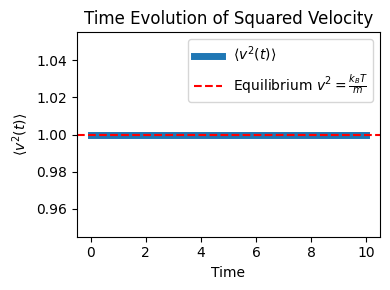

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
xi = 1.0        # Friction coefficient
m = 1.0        # Mass of the particle
kB = 1.0       # Boltzmann constant
T = 1.0        # Temperature
B = kB * T * xi
v0 = 1 # Initial velocity

# Calculate <v^2(t)> as a function of t
def v_squared(t, v0, xi, m, B):
    return np.exp(-2*xi*t/m) * v0**2 + (B/(xi*m))*(1 - np.exp(-2*xi*t/m))

t_values = np.linspace(0, 10, 400)
v2_values = v_squared(t_values, v0, xi, m, B)

plt.figure(figsize=(4, 3))
plt.plot(t_values, v2_values, label=r'$\langle v^2(t) \rangle$', linewidth=5)
plt.axhline(y=kB*T/m, color='r', linestyle='--', label=r'Equilibrium $v^2 = \frac{k_B T}{m}$')
plt.xlabel("Time")
plt.ylabel(r"$\langle v^2(t) \rangle$")
plt.legend()
plt.title("Time Evolution of Squared Velocity")
plt.tight_layout()
plt.show()


## Another example - Kinetics of a First-Order Isomerization Reaction

The balance between friction and noise is an example of the fluctuation-dissipation theorem, one of the fundamental theoremsemts in equilibrium statistical mechanics. In this part, we apply the Fluctuation-Dissipation Theorem to a problem of Chemical Kinetics.

Consider a reversible chemical reaction bewteen species $A$ and $B$ (e.g., isomerization reaction) given by:

$$ A \rightleftharpoons B $$

For a given system with constant total concentration, the relationship between the concentrations is:

$$ [A] + [B] = \text{constant}. $$

The basic rate equations of the reaction, with the reaction constants of the forward $k_1$ and reverse $k_2$ reactions, are:

$$ \frac{d[A]}{dt} = -k_1[A] + k_2[B] $$

$$ \frac{d[B]}{dt} = k_1[A] - k_2[B] $$

## Question 2-5. What is the condition under which the equilibrium is reached?

## Answer 2-5.
$$ \frac{d[A]}{dt} = \frac{d[B]}{dt}$$

Introducing a deviation $C $ from the equilibrium concentration of A or B:

$$ C = [A] - [A]_{eq} = [B]_{eq} - [B] $$,
where $ [A]_{eq} $ and $ [B]_{eq} $ are the equilibrium concentrations of A and B, respectively. Expressing the reaction rate in terms of deviation $C$ with the equilibrium condition, you arrive at the following simple differential equation:

$$ \frac{dC}{dt} = -(k_1 + k_2)C.$$ (Eq. 2)
As one may notice, Eq. 2 well describes the equilibrium concentrations $A$ and $B$. The fluctuation of $C$ at two different times $t$ and $t'$ is a simple exponentially-decaying function:

$$ \langle C(t)C(t') \rangle = \langle C^2 \rangle_{eq}\exp[-(k_1+k_2)|t-t'|].$$ (Eq. 3)
Here, $\langle C^2 \rangle_{eq}$ is the variance of the fluctuation in $C$ in equilibrium.

## Question 2-6. Discuss a possible problem of Eq. 3 in the context of $dynamical$ equilibrium in Chemistry.

## Answer 2-6.
It looks like it stopped because the speed is the same. Fluctuations should not be ignored to represent this as in the context of 𝑑𝑦𝑛𝑎𝑚𝑖𝑐𝑎𝑙 equilibrium in chemistry.

Actually, since the concentrations, including $A$, $B$, and even $C$, are on the order of Avogadro's number, the fluctuations should be not negligible. Thus, we add a fluctuating force $\delta F(t)$ to Eq. 2, as we did for a particle in a viscous liquid. The the rate equation becomes stochastic as follows:

$$ \frac{dC}{dt} = -(k_1 + k_2)C + \delta F(t).$$

The fluctuating force again satisfies the two properties:
$$ (i) \langle \delta F(t) \rangle = 0 $$
and
$$ (ii) \langle \delta F(t)\delta F(t')\rangle=2B\delta(t-t'). $$

## Question 2-7. Determine $B$, and discuss the implications of this fluctuation-dissipation relationship in chemical kinetics. Hint: In determining B, have a close look at Questions 2-2,-3,-4.

## Answer 2-7. XXX